In [ ]:
import numpy as np
import pandas as pd
import cv2
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
from PIL import Image

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df_cocostuff = pd.read_csv('/content/drive/MyDrive/HABs/trained_model_test/cocostuff/IoU_results.csv')
df_cityscapes = pd.read_csv('/content/drive/MyDrive/HABs/trained_model_test/cityscapes/IoU_results.csv')
df_postdam = pd.read_csv('/content/drive/MyDrive/HABs/trained_model_test/postdam/IoU_results.csv')
df_test = pd.read_csv('/content/drive/MyDrive/HABs/new_data_model_test/IoU_results_same_params.csv')

# These csv files are from IoU analysis using a CIcyano mask based on only red colors(high concentraion) instead of all
#df_cocostuff = pd.read_csv('/content/drive/MyDrive/trained_model_test_reds/cocostuff/IoU_results_reds.csv')
#df_cityscapes = pd.read_csv('/content/drive/MyDrive/trained_model_test_reds/cityscapes/IoU_results_reds.csv')
#df_postdam = pd.read_csv('/content/drive/MyDrive/trained_model_test_reds/postdam/IoU_results_reds.csv')

In [ ]:
df_cocostuff.head(1)

,stego_pred_lin_name,stego_pred_clus_name,date,cyano_img_name,location,color_img_name,IoU_lin,IoU_clus
0,sentinel-3.2022091.0401.1530C.a.L3.LE3.v951T2...,sentinel-3.2022091.0401.1530C.a.L3.LE3.v951T2...,2022-04-01,sentinel-3.2022091.0401.1530C.a.L3.LE3.v951T2...,WesternLErie,sentinel-3.2022091.0401.1530C.a.L3.LE3.v951T2...,0.009434,0.010582


In [ ]:
m_iou_lin_coco =df_cocostuff['IoU_lin'].mean()
m_iou_clus_coco = df_cocostuff['IoU_clus'].mean()

m_iou_lin_city = df_cityscapes['IoU_lin'].mean()
m_iou_clus_city = df_cityscapes['IoU_clus'].mean()

m_iou_lin_post = df_postdam['IoU_lin'].mean()
m_iou_clus_post = df_postdam['IoU_clus'].mean()

m_iou_lin_test = df_test['IoU_lin'].mean()
m_iou_clus_test = df_test['IoU_clus'].mean()


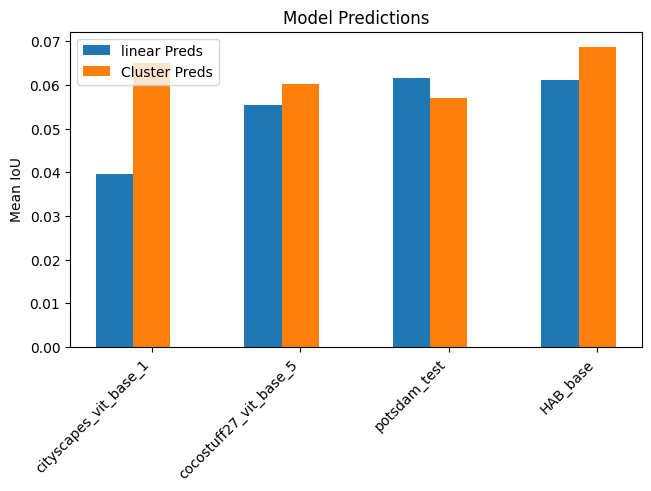

In [ ]:
model = ("cityscapes_vit_base_1", "cocostuff27_vit_base_5",  "potsdam_test", 'HAB_base')
iou_means = {
    'linear Preds': (m_iou_lin_city, m_iou_lin_coco, m_iou_lin_post, m_iou_lin_test ),
    'Cluster Preds': (m_iou_clus_city, m_iou_clus_coco, m_iou_clus_post, m_iou_clus_test ),
}
x = np.arange(len(model))  # the label locations
width = 0.25  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(layout='constrained')

for attribute, measurement in iou_means.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    #ax.bar_label(rects, padding=3)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Mean IoU')
ax.set_title('Model Predictions')
ax.set_xticks(x + width, model)
ax.legend(loc='best')
#ax.set_ylim(0, 250)
plt.xticks(rotation=45, ha='right')

plt.show()

In [ ]:
# filter by weeks with positive manuel samples
# 7/18/22 to 10/24/22 had positive disolved results in Wester Lake Erie
#df_filter = df_subset[(df_subset['date'] > '2022-07-17') & (df_subset['date'] < '2022-10-25')]
#print(df_filter['IoU_lin'].describe())
#print(df_filter['IoU_clus'].describe())

In [ ]:
df_cocostuff = df_cocostuff[(df_cocostuff['date'] > '2022-07-17') & (df_cocostuff['date'] < '2022-10-25')]
df_cityscapes = df_cityscapes[(df_cityscapes['date'] > '2022-07-17') & (df_cityscapes['date'] < '2022-10-25')]
df_postdam = df_postdam[(df_postdam['date'] > '2022-07-17') & (df_postdam['date'] < '2022-10-25')]
df_test = df_test[(df_test['date'] > '2022-07-17') & (df_test['date'] < '2022-10-25')]

In [ ]:
m_iou_lin_coco =df_cocostuff['IoU_lin'].mean()
m_iou_clus_coco = df_cocostuff['IoU_clus'].mean()

m_iou_lin_city = df_cityscapes['IoU_lin'].mean()
m_iou_clus_city = df_cityscapes['IoU_clus'].mean()

m_iou_lin_post = df_postdam['IoU_lin'].mean()
m_iou_clus_post = df_postdam['IoU_clus'].mean()

m_iou_lin_test = df_test['IoU_lin'].mean()
m_iou_clus_test = df_test['IoU_clus'].mean()

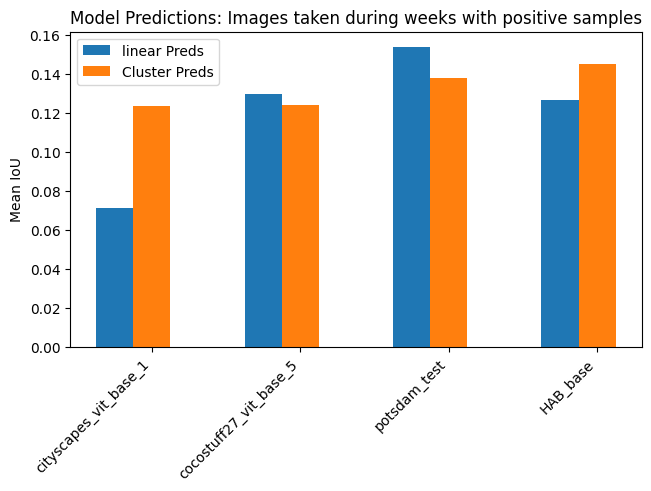

In [ ]:
model = ("cityscapes_vit_base_1", "cocostuff27_vit_base_5",  "potsdam_test", 'HAB_base')
iou_means = {
    'linear Preds': (m_iou_lin_city, m_iou_lin_coco, m_iou_lin_post, m_iou_lin_test ),
    'Cluster Preds': (m_iou_clus_city, m_iou_clus_coco, m_iou_clus_post, m_iou_clus_test ),
}
x = np.arange(len(model))  # the label locations
width = 0.25  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(layout='constrained')

for attribute, measurement in iou_means.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    #ax.bar_label(rects, padding=3)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Mean IoU')
ax.set_title('Model Predictions: Images taken during weeks with positive samples')
ax.set_xticks(x + width, model)
ax.legend(loc='best')
#ax.set_ylim(0, 250)
plt.xticks(rotation=45, ha='right')

plt.show()

In [ ]:
# filter by days with good images
good_pics = pd.read_csv('/content/WLE_good_dates.csv')
print(good_pics.dtypes)
dates_dict = dict(zip(good_pics.date, good_pics.good))
#dates_dict
#df_cocostuff.dtypes

date    object
good     int64
dtype: object


In [ ]:
df_cocostuff['good'] = df_cocostuff['date'].map(dates_dict)
df_cityscapes['good'] = df_cityscapes['date'].map(dates_dict)
df_postdam['good'] = df_postdam['date'].map(dates_dict) 
df_test['good'] = df_test['date'].map(dates_dict) 

In [ ]:
df_cocostuff.head()

,stego_pred_lin_name,stego_pred_clus_name,date,cyano_img_name,location,color_img_name,IoU_lin,IoU_clus,good
136,sentinel-3.2022199.0718.1530C.a.L3.LE3.v951T2...,sentinel-3.2022199.0718.1530C.a.L3.LE3.v951T2...,2022-07-18,sentinel-3.2022199.0718.1530C.a.L3.LE3.v951T2...,WesternLErie,sentinel-3.2022199.0718.1530C.a.L3.LE3.v951T2...,0.047316,0.081051,1
137,sentinel-3.2022200.0719.1504_1605C.ab.L3.LE3....,sentinel-3.2022200.0719.1504_1605C.ab.L3.LE3....,2022-07-19,sentinel-3.2022200.0719.1504_1605C.ab.L3.LE3....,WesternLErie,sentinel-3.2022200.0719.1504_1605C.ab.L3.LE3....,0.103128,0.270118,1
138,sentinel-3.2022201.0720.1539_1618C.ab.L3.LE3....,sentinel-3.2022201.0720.1539_1618C.ab.L3.LE3....,2022-07-20,sentinel-3.2022201.0720.1539_1618C.ab.L3.LE3....,WesternLErie,sentinel-3.2022201.0720.1539_1618C.ab.L3.LE3....,0.108414,0.099465,1
139,sentinel-3.2022202.0721.1513_1552C.ab.L3.LE3....,sentinel-3.2022202.0721.1513_1552C.ab.L3.LE3....,2022-07-21,sentinel-3.2022202.0721.1513_1552C.ab.L3.LE3....,WesternLErie,sentinel-3.2022202.0721.1513_1552C.ab.L3.LE3....,0.145255,0.176647,1
140,sentinel-3.2022203.0722.1526C.a.L3.LE3.v951T2...,sentinel-3.2022203.0722.1526C.a.L3.LE3.v951T2...,2022-07-22,sentinel-3.2022203.0722.1526C.a.L3.LE3.v951T2...,WesternLErie,sentinel-3.2022203.0722.1526C.a.L3.LE3.v951T2...,0.082958,0.054722,1


In [ ]:
df_cocostuff = df_cocostuff[df_cocostuff['good'] == 1]
df_cityscapes = df_cityscapes[df_cityscapes['good'] == 1]
df_postdam = df_postdam[df_postdam['good'] == 1]
df_test = df_test[df_test['good'] == 1]

In [ ]:
m_iou_lin_coco =df_cocostuff['IoU_lin'].mean()
m_iou_clus_coco = df_cocostuff['IoU_clus'].mean()

m_iou_lin_city = df_cityscapes['IoU_lin'].mean()
m_iou_clus_city = df_cityscapes['IoU_clus'].mean()

m_iou_lin_post = df_postdam['IoU_lin'].mean()
m_iou_clus_post = df_postdam['IoU_clus'].mean()

m_iou_lin_test = df_test['IoU_lin'].mean()
m_iou_clus_test = df_test['IoU_clus'].mean()

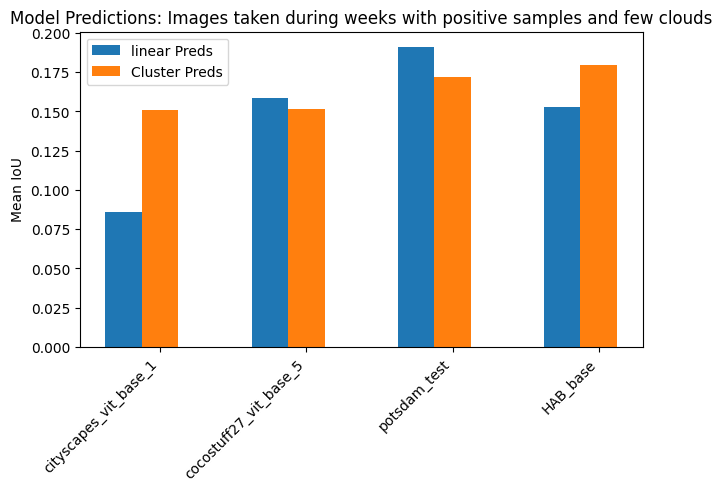

In [ ]:
model = ("cityscapes_vit_base_1", "cocostuff27_vit_base_5",  "potsdam_test", 'HAB_base')
iou_means = {
    'linear Preds': (m_iou_lin_city, m_iou_lin_coco, m_iou_lin_post, m_iou_lin_test ),
    'Cluster Preds': (m_iou_clus_city, m_iou_clus_coco, m_iou_clus_post, m_iou_clus_test ),
}
x = np.arange(len(model))  # the label locations
width = 0.25  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(layout='constrained')

for attribute, measurement in iou_means.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    #ax.bar_label(rects, padding=3)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Mean IoU')
ax.set_title('Model Predictions: Images taken during weeks with positive samples and few clouds')
ax.set_xticks(x + width, model)
ax.legend(loc='best')
#ax.set_ylim(0, 250)
plt.xticks(rotation=45, ha='right')

plt.show()

In [ ]:
#Select images to view by df index number

STEGO_img_pred_dir_lin = '/content/drive/MyDrive/HABs/STEGO_preds/linear_preds/'
STEGO_img_pred_dir_clus = '/content/drive/MyDrive/HABs/STEGO_preds/cluster_preds/'
#STEGO_img_pred_dir_lin = '/content/linear_preds/'
#STEGO_img_pred_dir_clus = '/content/cluster_preds/'
noaa_img_dir_cyano = '/content/drive/MyDrive/HABs/noaa_imgs_cyano/'
noaa_img_dir = '/content/drive/MyDrive/HABs/noaa_imgs_color/'

def get_res_vis(df_subset, index_num):
#df column order must be:
#[stego_pred_lin_name,	stego_pred_clus_name,	date,	cyano_img_name,	location,	color_img_name,	IoU_lin,	IoU_clus]

  img_path_1 = df_subset.iloc[index_num,5]
  img_path_2 = df_subset.iloc[index_num,3]
  img_path_3 = df_subset.iloc[index_num,0]
  img_path_4 = df_subset.iloc[index_num,1]

  #make plot
  fig, ax = plt.subplots(2,2, figsize=(8,8))
  ax[0,0].imshow(Image.open(noaa_img_dir+img_path_1), extent=[0,100,0,100], aspect=.84)
  ax[0,0].set_title("Image")
  ax[0,0].axis('off')
  ax[0,1].imshow(Image.open(noaa_img_dir_cyano+img_path_2), extent=[0,100,0,100], aspect=.84)
  ax[0,1].set_title("NOAA CI Predictions")
  ax[0,1].axis('off')
  ax[1,0].imshow(Image.open(STEGO_img_pred_dir_lin+img_path_3), extent=[0,100,0,100], aspect=.84)
  ax[1,0].set_title("STEGO Linear Predictions")
  ax[1,0].axis('off')
  ax[1,1].imshow(Image.open(STEGO_img_pred_dir_clus+img_path_4), extent=[0,100,0,100], aspect=.84)
  ax[1,1].set_title("STEGO Cluster Predictions")
  ax[1,1].axis('off')